In [1]:
from daily_report_functions import *
import pandas as pd 

In [2]:
df = load_match_list()

meiko_on = shared_games_list(["ON"],["meiko"],df)[0]

In [3]:
meiko_on_match_list = meiko_on[["Date","Duration","Game"]].drop_duplicates()

In [4]:
meiko_on_match_list

,Date,Duration,Game
0,2021-06-24,32:21,Suning vs EDG
1,2021-06-24,32:09,Suning vs EDG
2,2021-02-05,29:03,EDG vs Suning
3,2021-02-05,31:32,EDG vs Suning
4,2022-06-13,29:09,WBG vs EDG
5,2022-06-13,37:47,WBG vs EDG
6,2022-03-29,36:51,WBG vs EDG
7,2022-03-29,40:28,WBG vs EDG
8,2022-03-29,42:46,WBG vs EDG
9,2022-03-29,39:36,WBG vs EDG


In [5]:
meiko_on_matches = meiko_on_match_list.merge(df[(df["player"] == "ON")| (df["player"] == "meiko")], on = ["Date","Duration","Game"])

In [6]:
meiko_on_matches["KA"] = meiko_on_matches["K"] + meiko_on_matches["A"]

In [7]:
meiko_on_matches

,Date,Duration,Game,Champion,Result,Score,Build,Tournament,player,gg_id,season,duration_minutes,K,D,A,KA
0,2021-06-24,32:21,Suning vs EDG,Karma,Defeat,0/4/2,,LPL Summer 2021,ON,3353,S11,32.350000,0,4,2,2
1,2021-06-24,32:21,Suning vs EDG,Nautilus,Victory,2/1/10,,LPL Summer 2021,meiko,386,S11,32.350000,2,1,10,12
2,2021-06-24,32:09,Suning vs EDG,Leona,Defeat,2/5/7,,LPL Summer 2021,ON,3353,S11,32.150000,2,5,7,9
3,2021-06-24,32:09,Suning vs EDG,Karma,Victory,0/4/9,,LPL Summer 2021,meiko,386,S11,32.150000,0,4,9,9
4,2021-02-05,29:03,EDG vs Suning,Rell,Defeat,0/4/3,,LPL Spring 2021,ON,3353,S11,29.050000,0,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-01-22,27:29,BLG vs Top Esports,Soraka,Defeat,1/3/4,,LPL Spring 2024,meiko,386,S14,27.483333,1,3,4,5
78,2024-01-22,30:34,BLG vs Top Esports,Rakan,Defeat,1/3/0,,LPL Spring 2024,ON,3353,S14,30.566667,1,3,0,1
79,2024-01-22,30:34,BLG vs Top Esports,Renata Glasc,Victory,2/2/10,,LPL Spring 2024,meiko,386,S14,30.566667,2,2,10,12
80,2024-01-22,27:03,BLG vs Top Esports,Ashe,Victory,3/1/10,,LPL Spring 2024,ON,3353,S14,27.050000,3,1,10,13


In [ ]:
import plotly.express as px

fig = px.scatter(meiko_on_matches, y="KA", x="D", color="player", symbol="Result",)
fig.update_traces(marker_size=10)
fig.show()

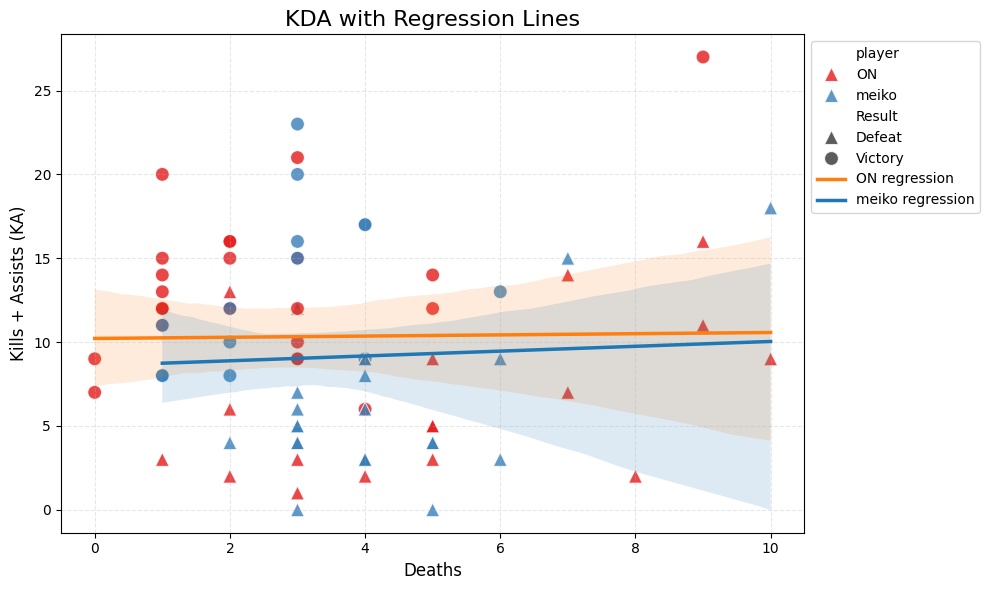

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# KA = K + A
meiko_on_matches["KA"] = meiko_on_matches["K"] + meiko_on_matches["A"]

plt.figure(figsize=(10, 6))

# Plot points
sns.scatterplot(
    data=meiko_on_matches,
    x="D", y="KA",
    hue="player", style="Result",
    palette="Set1",
    markers={"Victory": "o", "Defeat": "^"},
    s=100,
    alpha=0.8
)

# Regression lines per player
colors = {"ON": "#ff7f0e", "meiko": "#1f77b4"}  # Same as palette
for player in meiko_on_matches["player"].unique():
    sns.regplot(
        data=meiko_on_matches[meiko_on_matches["player"] == player],
        x="D", y="KA",
        scatter=False,
        label=f"{player} regression",
        color=colors[player],
        line_kws={"linewidth": 2.5}
    )

# Title and labels
plt.title("KDA with Regression Lines", fontsize=16,)
# plt.suptitle("Each point represents one game; KA = Kills + Assists", fontsize=10, y=0.92)
plt.xlabel("Deaths", fontsize=12)
plt.ylabel("Kills + Assists (KA)", fontsize=12)

# Legend tweaks
plt.legend(title="", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'KDA Distribution by Player and Result')

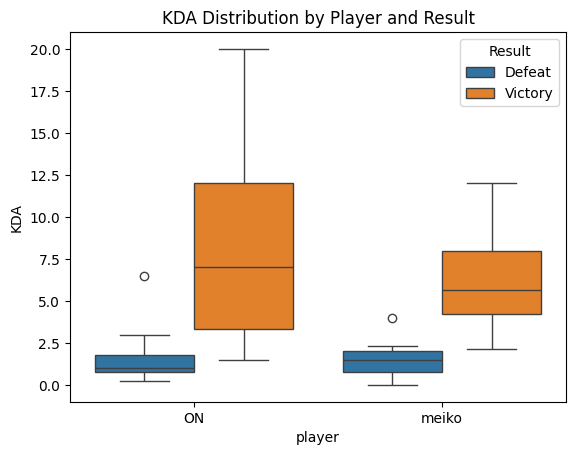

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
meiko_on_matches["KDA"] = (meiko_on_matches["KA"] / meiko_on_matches["D"].replace(0, np.nan))  # Handle div-by-zero

sns.boxplot(data=meiko_on_matches, x="player", y="KDA", hue="Result")
plt.title("KDA Distribution by Player and Result")

In [71]:
summary = meiko_on_matches.groupby(["player", "Champion"]).apply(
    lambda group: pd.Series({
        "总局数": int(group["Duration"].count()),
        "胜局数": int((group["Result"] == "Victory").sum()),
        "胜率": (group["Result"] == "Victory").mean().round(2),
        "平均KDA": ((group["K"].sum() + group["A"].sum()) / group["D"].sum()).round(2)
                    if group["D"].sum() > 0 else float("inf")
    })
).reset_index()


C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_9228\193533867.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [59]:
pivot_all.columns

MultiIndex([('Champion',      ''),
            (     '总局数',    'ON'),
            (     '总局数', 'meiko'),
            (     '胜局数',    'ON'),
            (     '胜局数', 'meiko'),
            (      '胜率',    'ON'),
            (      '胜率', 'meiko'),
            (   '平均KDA',    'ON'),
            (   '平均KDA', 'meiko')],
           names=[None, 'player'])

In [69]:
meiko_on_matches[meiko_on_matches["player"] == "ON"].value_counts("Champion")

Champion
Rakan           7
Rell            6
Leona           5
Nautilus        5
Renata Glasc    5
Karma           2
Nami            2
Thresh          2
Ashe            1
Blitzcrank      1
Camille         1
Kalista         1
Lux             1
Neeko           1
Ornn            1
Name: count, dtype: int64

In [93]:
pivot_all = summary.set_index(["Champion", "player"]).unstack("player")
champ_map_nickname = {
    "Alistar": "牛头",
    "Ashe": "寒冰",
    "Blitzcrank": "机器人",
    "Braum": "布隆",
    "Camille": "卡密尔",
    "Heimerdinger": "大头",
    "Kalista": "卡莉斯塔",
    "Karma": "卡尔玛",
    "Leona": "日女",
    "Lulu": "璐璐",
    "Lux": "拉克丝",
    "Nami": "娜美",
    "Nautilus": "泰坦",
    "Neeko": "妮蔻",
    "Ornn": "奥恩",
    "Rakan": "洛",
    "Rell": "瑞尔",
    "Renata Glasc": "列娜塔",
    "Seraphine": "萨勒芬妮",
    "Soraka": "索拉卡",
    "Tahm Kench": "塔姆",
    "Thresh": "锤石",
    "Yuumi": "猫咪",
    "Zilean": "时光"
}

pivot_all = pivot_all.rename(index=champ_map_nickname)  # 如果英雄名在 index 中
# # 或者：
# df["Champion"] = df["Champion"].replace(champ_map)  # 如果英雄在列中


In [90]:
# pivot_all = summary.set_index(["Champion", "player"]).unstack("player")
# pivot_all.columns = [f"{metric}_{player}" for metric, player in pivot_all.columns]
pivot_all = pivot_all.reset_index().dropna()

pivot_all.sort_values(by=(     '总局数',    'meiko'), ascending=False)

Champion  总局数        胜局数          胜率        平均KDA      
player            ON meiko   ON meiko    ON meiko     ON meiko
12           泰坦  5.0   7.0  3.0   4.0  0.60  0.57   3.00  2.38
15            洛  7.0   4.0  5.0   0.0  0.71  0.00   4.73  2.53
21           锤石  2.0   4.0  2.0   1.0  1.00  0.25   5.67  2.94
7           卡尔玛  2.0   3.0  0.0   1.0  0.00  0.33   0.78  1.30
14           奥恩  1.0   3.0  1.0   1.0  1.00  0.33   7.50  2.08
11           娜美  2.0   2.0  1.0   1.0  0.50  0.50   8.50  2.80
17          列娜塔  5.0   2.0  3.0   1.0  0.60  0.50   6.00  1.71
1            寒冰  1.0   1.0  1.0   1.0  1.00  1.00  13.00  4.25
8            日女  5.0   1.0  3.0   1.0  0.60  1.00   1.73  6.67

In [96]:
# pivot_all = summary.set_index(["Champion", "player"]).unstack("player")
# pivot_all.columns = [f"{metric}_{player}" for metric, player in pivot_all.columns]
pivot_all[(pivot_all["胜局数_ON"] == 0) | (pivot_all["胜局数_meiko"] == 0)]

,总局数_ON,总局数_meiko,胜局数_ON,胜局数_meiko,胜率_ON,胜率_meiko,平均KDA_ON,平均KDA_meiko
Champion,,,,,,,,
机器人,1.0,NaN,0.0,NaN,0.00,NaN,1.00,NaN
卡莉斯塔,1.0,NaN,0.0,NaN,0.00,NaN,1.78,NaN
卡尔玛,2.0,3.0,0.0,1.0,0.00,0.33,0.78,1.30
拉克丝,1.0,NaN,0.0,NaN,0.00,NaN,1.00,NaN
洛,7.0,4.0,5.0,0.0,0.71,0.00,4.73,2.53
萨勒芬妮,NaN,1.0,NaN,0.0,NaN,0.00,NaN,1.67
索拉卡,NaN,1.0,NaN,0.0,NaN,0.00,NaN,1.67
塔姆,NaN,1.0,NaN,0.0,NaN,0.00,NaN,2.25
时光,NaN,1.0,NaN,0.0,NaN,0.00,NaN,1.33


In [87]:
pivot_all[pivot_all["总局数_meiko"].isna()][["总局数_ON","胜率_ON"]]

,总局数_ON,胜率_ON
Champion,,
机器人,1.0,0.00
卡密尔,1.0,1.00
卡莉斯塔,1.0,0.00
拉克丝,1.0,0.00
妮蔻,1.0,1.00
瑞尔,6.0,0.33


In [102]:
meiko_on_matches.groupby(["player","Result"])["duration_minutes"].sum().reset_index()

,player,Result,duration_minutes
0,ON,Defeat,601.733333
1,ON,Victory,729.716667
2,meiko,Defeat,729.716667
3,meiko,Victory,601.733333
